# Natural Language Processing (NLP) to detect sarcasm


This code uses Natural Language Processing (NLP) to detect sarcasm in sentences that are news headlines. This data set was also used in a TensorFlow tutorial and part of that code is used. The links are provided below. 

https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

https://tinyurl.com/3v4ahzn8

In [1]:
from google.colab import drive
import os
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive'
os.chdir(data_path)

Mounted at /content/drive


# Load the data

In [3]:
def parseJson(fname):
    for line in open(fname, 'r'):
        yield eval(line)

In [4]:
datastore = list(parseJson('sarcasm.json'))

In [5]:
sentences = []
labels = []
urls = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

# Split the data into train and validation set




In [6]:
sentences_train, sentences_val, labels_train, labels_val = train_test_split(sentences,labels,stratify=labels,shuffle=True)

In [7]:
sentences_train[:10]

['is turkey drifting between isis & putin?',
 'democrats agree to reopen government without protections for dreamers',
 'woman accused of heinous sex crimes against 3-year-old and dog',
 'alyson stoner opens up about falling in love with a woman',
 'trump administration adds more foreign guest worker visas',
 "kids' behavior linked to moms' acetaminophen use during pregnancy",
 'how the deportation crackdown is hurting immigrant victims of crime',
 'kavanaugh panicking after botching part of confirmation where he asked if he rejects satan',
 "qaddafi asks closest advisers if they think he's a bad person",
 'dream team wins small soft drink']

# Tokenize the sentences

In [8]:
vocab_size = 10000
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences_train)
word_index = tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(sentences_train)
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [10]:
sequences_val = tokenizer.texts_to_sequences(sentences_val)
padded_val = pad_sequences(sequences_val,maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
padded_train = np.array(padded_train)
labels_train = np.array(labels_train)
padded_val = np.array(padded_val)
labels_val = np.array(labels_val)

# Build and train a model

In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                             
])

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [15]:
# After training with different num_epochs, 4 looks to be an appropriate number.
num_epochs = 4
history = model.fit(padded_train, labels_train, epochs=num_epochs, validation_data=(padded_val, labels_val), verbose=2)

Epoch 1/4
671/671 - 7s - loss: 0.6391 - accuracy: 0.6309 - val_loss: 0.4818 - val_accuracy: 0.8113 - 7s/epoch - 11ms/step
Epoch 2/4
671/671 - 4s - loss: 0.3752 - accuracy: 0.8497 - val_loss: 0.3626 - val_accuracy: 0.8449 - 4s/epoch - 5ms/step
Epoch 3/4
671/671 - 4s - loss: 0.2861 - accuracy: 0.8861 - val_loss: 0.3616 - val_accuracy: 0.8375 - 4s/epoch - 5ms/step
Epoch 4/4
671/671 - 3s - loss: 0.2412 - accuracy: 0.9049 - val_loss: 0.3310 - val_accuracy: 0.8539 - 3s/epoch - 5ms/step


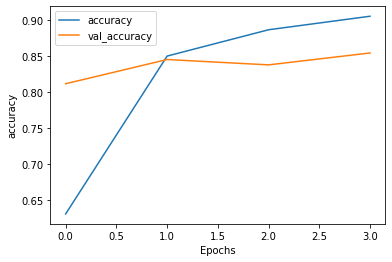

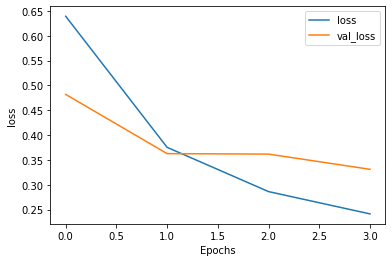

In [16]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Test the model with example sentences

In [17]:
example_sentences = ["Health Insurance Plan Only Covers Random Hippopotamus Attacks", "Florida Amusement Ride Operator's Mistake Led To Teen's Deadly Plunge, Officials Say"]

example_sequences = tokenizer.texts_to_sequences(example_sentences)
example_padded = pad_sequences(example_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(example_padded))

[[0.8318954 ]
 [0.04400903]]


The model correctly predicts the first sentence as sarcastic and the second one as not_sarcastic.